# 1.牛顿科茨公式求积分
### 代码：

n=1,2……50时，利用牛顿科茨公式计算积分值为：
[ 3.84615385e-01  6.79487179e+00  2.08144796e+00  2.37400531e+00
  2.30769231e+00  3.87044867e+00  2.89899441e+00  1.50048891e+00
  2.39861790e+00  4.67330056e+00  3.24477294e+00 -3.12936516e-01
  1.91979722e+00  7.89954464e+00  4.15555899e+00 -6.24143731e+00
  2.60509442e-01  1.88766213e+01  7.24602609e+00 -2.68495521e+01
 -5.56443277e+00  5.80439327e+01  1.83601916e+01 -1.02127751e+02
 -2.69993052e+01  2.04171012e+02  6.00962421e+01 -3.88295276e+02
 -1.08954492e+02  7.68989442e+02  2.22242967e+02 -1.51089601e+03
 -4.31923118e+02  3.01416906e+03  8.69432170e+02 -6.02588699e+03
 -1.73455215e+03  1.22685209e+04  4.52967715e+03  6.38766108e+05
  1.78885203e+05  4.37205604e+04 -5.03845904e+05 -6.42891710e+05
  8.27367405e+07 -8.87288648e+10 -3.39525483e+07  4.56699473e+09
  6.33089435e+09 -6.34962064e+08]
由于n>30时误差过大，导致曲线显示困难，因此只绘制n取0到30这段图像


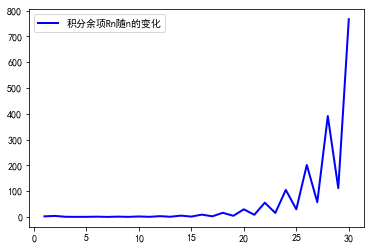

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
from scipy.integrate import newton_cotes
Y=np.zeros(50)
for N in range(1,51):
    x=np.linspace(-5,5,N+1) #将区间[-5,5]等分为N+1个节点
    y=1/(1+x**2)
    cn,B=newton_cotes(N,1)
    new=10*cn/N
    Y[N-1]=np.dot(y,new)
f=2*np.arctan(5)
print("n=1,2……50时，利用牛顿科茨公式计算积分值为：")
print(Y)
print("由于n>30时误差过大，导致曲线显示困难，因此只绘制n取0到30这段图像")
plt.figure()
plt.plot(range(1,31),abs(f-Y)[0:30],color="blue",label="积分余项Rn随n的变化",linewidth=2)
plt.legend()
plt.show()

n=1,2……50时，利用牛顿科茨公式计算积分值已在上文展示，观察发现积分余项Rn不收敛。主要是由于求积系数$\omega_{i}$在n较大时有正有负，不易导致稳定性与收敛性

# 2.复合公式和高斯公式求积分
### 代码：

In [2]:
import numpy as np
from scipy.integrate import simps
def f(x):
    y1=4/(1+x**2)
    return(y1)
a,b=0.0,1.0
eps,I1=1e-8,np.pi
n,N=2,10
#采用变步长辛普森公式保证精度
for i in range(N):
    x=np.linspace(a,b,n+1)
    y=f(x)
    I2=simps(y,x)
    err1=np.abs(I2-I1)
    if err1<eps:
        print("复合辛普森公式求得积分与误差：")
        print('%16.6e %16.6e'%(I2,np.abs(I2-I1)))
        break
    else:
        n=n*2
#采用变步长方式保证复合三点高斯勒让德公式精度
for i in range(N):
    x=np.linspace(a,b,n+1)
    y=0
    h=(b-a)/n
    for j in range(n):
        y=y+(5/9*f((x[j]+x[j+1])/2+h/2*(-0.6**0.5))+8/9*f((x[j]+x[j+1])/2)+5/9*f((x[j]+x[j+1])/2+h/2*(0.6**0.5)))*h/2
    err1=np.abs(y-I1)
    if err1<eps:
        print("复合三点高斯勒让德公式求得积分与误差：")
        print('%16.6e %16.6e'%(y,np.abs(y-I1)))
        break
    else:
        n=n*2

复合辛普森公式求得积分与误差：
    3.141593e+00     2.364971e-09
复合三点高斯勒让德公式求得积分与误差：
    3.141593e+00     1.773692e-12


# 3.数值积分公式的收敛性
### 代码：

0.625


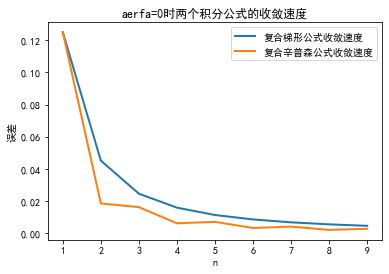

0.3846153846153846


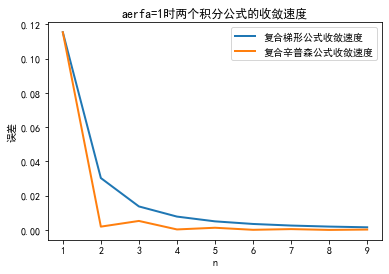

0.2777777777777778


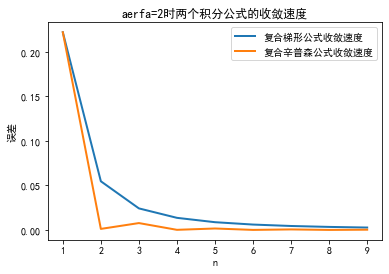

0.2173913043478261


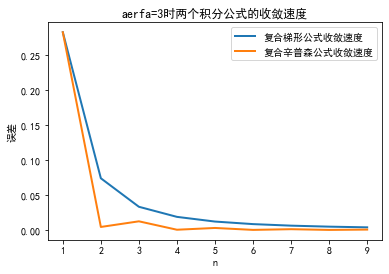

0.17857142857142858


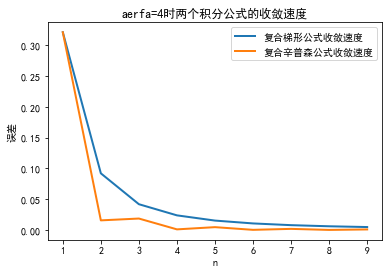

In [3]:
import numpy as np
from scipy.integrate import trapz
from scipy.integrate import simps
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

for aerfa in range(5):
    def f(x):
        y1=x**(aerfa+0.6)
        return(y1)
    a,b=0.0,1.0
    I=1/(aerfa+1.6)
    print(I)
    n,N=1,9
    err1=np.zeros(9)
    err2=np.zeros(9)
    for i in range(N):
        x=np.linspace(a,b,n+1)
        y=f(x)
        I1=trapz(y,x)
        I2=simps(y,x)
        err1[i]=np.abs(I1-I)
        err2[i]=np.abs(I2-I)
        n=n+1
    plt.figure()
    plt.plot(range(1,10),err1,label="复合梯形公式收敛速度",linewidth=2)
    plt.plot(range(1,10),err2,label="复合辛普森公式收敛速度",linewidth=2)
    plt.title("aerfa={}时两个积分公式的收敛速度".format(aerfa))
    plt.xlabel("n")
    plt.ylabel("误差")
    plt.legend()
    plt.show()

两个积分公式都收敛，且复合辛普森公式收敛速度更快

# 4.数值微分
### 代码：

In [4]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

X=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990]
Y=[76,92,106.5,123.2,131.7,150.7,179.3,204,226.5,251.4]
#两点法
f=0
for i in range(9):
    f=(Y[i+1]-Y[i])/10+f
f=f/9  #求均值
print("两点公式计算美国人口20世纪的平均年增长率{}".format(f))
#三点法
g=0
for i in range(1,9):
    g=(Y[i+1]-Y[i-1])/20+g
g=g/8 #求均值g
print("三点公式计算美国人口20世纪的平均年增长率{}".format(g))

两点公式计算美国人口20世纪的平均年增长率1.9488888888888891
三点公式计算美国人口20世纪的平均年增长率1.9368750000000001
